# 3.2 観測されたデータの概要を調べる

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('./data3a.csv')

In [3]:
df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [4]:
df.y

0      6
1      6
2      6
3     12
4     10
5      4
6      9
7      9
8      9
9     11
10     6
11    10
12     6
13    10
14    11
15     8
16     3
17     8
18     5
19     5
20     4
21    11
22     5
23    10
24     6
25     6
26     7
27     9
28     3
29    10
      ..
70    10
71     8
72     8
73     7
74     5
75     6
76     8
77     9
78     9
79     6
80     7
81    10
82     6
83    11
84    11
85    11
86     5
87     6
88     4
89     5
90     6
91     5
92     8
93     5
94     9
95     8
96     6
97     8
98     7
99     9
Name: y, dtype: int64

In [5]:
df.x

0      8.31
1      9.44
2      9.50
3      9.07
4     10.16
5      8.32
6     10.61
7     10.06
8      9.93
9     10.43
10    10.36
11    10.15
12    10.92
13     8.85
14     9.42
15    11.11
16     8.02
17    11.93
18     8.55
19     7.19
20     9.83
21    10.79
22     8.89
23    10.09
24    11.63
25    10.21
26     9.45
27    10.44
28     9.44
29    10.48
      ...  
70    10.54
71    11.30
72    12.40
73    10.18
74     9.53
75    10.24
76    11.76
77     9.52
78    10.40
79     9.96
80    10.30
81    11.54
82     9.42
83    11.28
84     9.73
85    10.78
86    10.21
87    10.51
88    10.73
89     8.85
90    11.20
91     9.86
92    11.54
93    10.03
94    11.88
95     9.15
96     8.52
97    10.24
98    10.86
99     9.97
Name: x, dtype: float64

In [6]:
df.f

0     C
1     C
2     C
3     C
4     C
5     C
6     C
7     C
8     C
9     C
10    C
11    C
12    C
13    C
14    C
15    C
16    C
17    C
18    C
19    C
20    C
21    C
22    C
23    C
24    C
25    C
26    C
27    C
28    C
29    C
     ..
70    T
71    T
72    T
73    T
74    T
75    T
76    T
77    T
78    T
79    T
80    T
81    T
82    T
83    T
84    T
85    T
86    T
87    T
88    T
89    T
90    T
91    T
92    T
93    T
94    T
95    T
96    T
97    T
98    T
99    T
Name: f, dtype: object

In [7]:
df.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


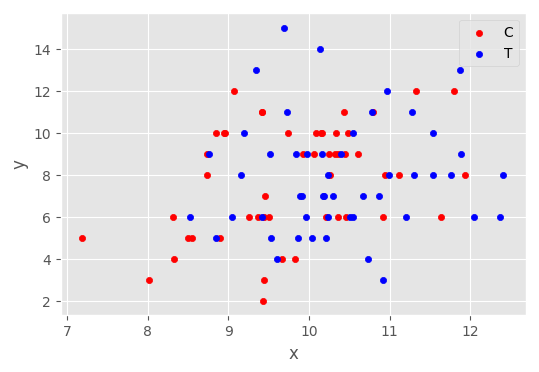

In [8]:
fig, ax = plt.subplots()
df[df['f'] == 'C'] .plot(kind='scatter', x='x', y='y', color='red', ax=ax, label='C')
df[df['f'] == 'T'] .plot(kind='scatter', x='x', y='y', color='blue', ax=ax, label='T')

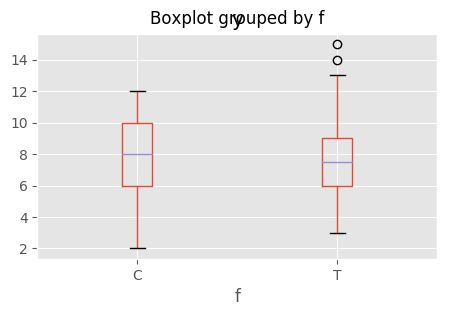

In [9]:
# なんかめっちゃ時間かかったけどこれが正解っぽい？
df.boxplot(column='y', by='f', figsize=(5, 3))

* CはXが大きくなるとYも大きくなっている？

$$
p(y_i | \lambda_{i}) = \frac{\lambda_{i}^{y_i} exp(-\lambda_{i})}{y_{i}!}
$$

ある固定$i$において、種子数が$y_i$である確率$p(y_i | \lambda_{i})$はポアソン分布にしたがって上のように仮定する

## 3.4.1 線形予測子と対数リンク関数

$$
\lambda_{i} = exp(\beta_1 + \beta_2 x_i)
$$

この個体ごとにことなる平均 $\lambda_i$ を説明変数$x_i$の関数として定義しなければなりません。ということで上

In [10]:
import numpy as np
# ポワソン分布の実装
def poission_pmf(_y, _lambda=3.56):
    under = np.prod([i for i in range(1, _y + 1)])
    return _lambda**_y * (np.e ** - _lambda) / under

In [11]:
poission_pmf(2)

0.18021114444884442

In [12]:
df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


$exp()$は`e**()` <-こういうことである

In [13]:
def my_exp(b_1, b_2, x):
    return np.e ** (b_1 + (b_2 * x))

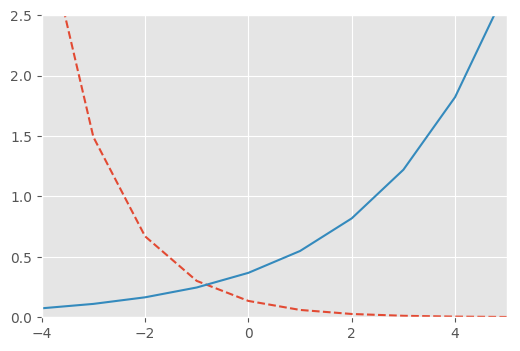

In [14]:
x = range(-4, 6)
y1 = [my_exp(-2, -0.8, _x) for _x in x]
y2 = [my_exp(-1, 0.4, _x) for _x in x]

_, ax = plt.subplots()
ax.plot(x, y1, linestyle='dashed')
ax.plot(x, y2)
ax.set_xlim([-4, 5])
ax.set_xticks([i for i in range(-4, 5, 2)])
ax.set_ylim([0.0, 2.5])
plt.show()

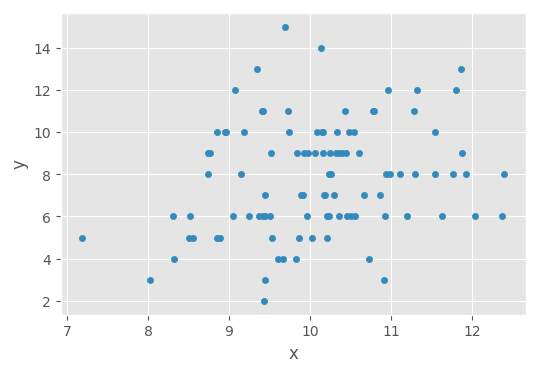

In [15]:
df[['y', 'x']].plot.scatter(x='x', y='y')

上の定式化の意味を知る前に、線形予測子とリンク関数というGLMを特徴づけるふたつの概念を紹介するとのこと

今回のモデルの平均種子数$\lambda_i$の式は

$$
\log \lambda_i = \beta_i + \beta_2 x_i
$$

あーなるほど。さっきの$\lambda_i = ... $は上に変形できるのか

## 3.4.2 あてはめとあてはまりの良さ

ポアソン回帰は、観測データに対するポアソン分布を使った統計モデルのあてはめであり、この統計モデルの対数尤度$log L$が最大になるパラメータ$\hat{\beta_1}$,$\hat{\beta_2}$の推定値を決めることです。データ$Y$のもとでの、このモデルの対数尤度は

$$
\log L(\beta_1, \beta_2) = \sum_i log \frac{\lambda_{i}^{y_i} exp(-\lambda_i)}{y_i!}
$$

となります。線形予測子は$\log \lambda_i = \beta_i + \beta_2 x_i$となっているので、$\lambda_i$が$\beta_1$と$\beta_2$の関数であることに注意

In [16]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /Users/kazumatamaki/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages (0.9.0)
Requirement not upgraded as not directly required: pandas in /Users/kazumatamaki/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages (from statsmodels) (0.18.0)
Requirement not upgraded as not directly required: patsy in /Users/kazumatamaki/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages (from statsmodels) (0.4.0)
Requirement not upgraded as not directly required: python-dateutil>=2 in /Users/kazumatamaki/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages (from pandas->statsmodels) (2.5.1)
Requirement not upgraded as not directly required: pytz>=2011k in /Users/kazumatamaki/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages (from pandas->statsmodels) (2016.2)
Requirement not upgraded as not directly required: numpy>=1.7.0 in /Users/kazumatamaki/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages (from pandas

実装しようと思ったが、実装がみつからない

In [19]:
import statsmodels.api as sm

# 最尤推定(切片も含む場合はadd_constant()で値を渡す)
results = sm.Poisson(df['y'], sm.add_constant(df['x'])).fit()
# 結果の出力
results.summary()

Optimization terminated successfully.
         Current function value: 2.353863
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jun 2018   Pseudo R-squ.:                0.009497
Time:                        16:49:54   Log-Likelihood:                -235.39
converged:                       True   LL-Null:                       -237.64
                                        LLR p-value:                   0.03362
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [21]:
results = sm.GLM(df['y'], sm.add_constant(df['x']), family=sm.families.Poisson()).fit()
# 結果の出力
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Sun, 10 Jun 2018   Deviance:                       84.993
Time:                        16:50:02   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

pythonの場合は、coef:const -> 切片、coef:x -> 傾きとなる

std err が標準誤差、推定値B1,B2のばらつきを標準偏差で表したもの -> なんのこっちゃ

* coef -> 最尤推定値
  * const -> 切片
  * x -> 傾き（特徴量）
* std err -> 標準誤差, なんのこっちゃなので「同じ調査方法で同数の別データをとりなおしてみたりすると、最尤推定値もけっこう変わるので、そのばらつき具合」
* z -> z値と呼ばれる統計量. 最尤推定値をSEで除した値. wald信頼区間というものを構成でき、推定値たちがゼロから十分に離れているかどうか粗い目安になる
* P>|z| -> 平均がz値の絶対値であり、標準偏差が1の正規分布における、マイナス無限大からゼロまでの値をとる確率の２倍です（なんのこっちゃ
  * この確率が大きいほどz値がゼロに近くなり,推定値b1b2がゼロに近いことを表現するひとつの方法
  * 統計P値

* Log-Likelihood -> 最大対数尤度. こいつがあてはまりの良さ. これが最大のところがあてはまりがよい
* つまりパラメータが、b2 = 1.2917, b1 = 0.0757のとき、対数尤度が最大をとる

## 3.4.3 ポアソン回帰モデルによる予測

ポアソン回帰の推定結果を使って平均種子数の予測を行う

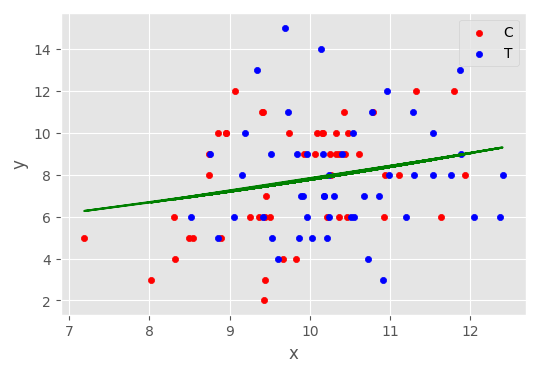

In [40]:
# 予測
py = [my_exp(1.2917, 0.0757, x) for x in df['x']]

# 結果をプロット
_, ax = plt.subplots()
ax.plot(df['x'], py, color='g')
df[df['f'] == 'C'] .plot(kind='scatter', x='x', y='y', color='red', ax=ax, label='C')
df[df['f'] == 'T'] .plot(kind='scatter', x='x', y='y', color='blue', ax=ax, label='T')

ここまでまとめると？

* 線形予測子と対数リンク関数（ポアソン分布）を使って予測する
* このとき、対数尤度が最大になるパラメータを推定する必要がある -> 最尤推定を行った
* 最尤推定で最大対数尤度を出して、そのときのパラメータを使って、予測する

かな

## 説明変数が因子型の統計モデル

* ダミー変数化
* $\lambda_i = exp(\beta_1 + \beta_3 d_i)$

$$
d_i = \begin{cases}
    0 (f_i = Cの場合) \\
    1 (f_i = Tの場合)
\end{cases}
$$

Pythonはファクターがないので、ダミー変数かする

In [59]:
len(df)

100

In [67]:
dummies = pd.get_dummies(df['f'])
df2 = pd.merge(df, dummies, left_index=True, right_index=True)

In [68]:
df2.head()

,y,x,f,C,T
0,6,8.31,C,1.0,0.0
1,6,9.44,C,1.0,0.0
2,6,9.50,C,1.0,0.0
3,12,9.07,C,1.0,0.0
4,10,10.16,C,1.0,0.0


In [70]:
results = sm.GLM(df['y'], sm.add_constant(df2['C']), family=sm.families.Poisson()).fit()
# 結果の出力
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Sun, 10 Jun 2018   Deviance:                       89.475
Time:                        21:25:57   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0643      0.050     40.976      0.000       1.966       2.163
C             -0.0128      0.071     -0.179      0.858      -0.153       0.127
==============================================================================
"""

In [74]:
np.e ** (2.0643)

7.879780120573828

In [69]:
results = sm.GLM(df['y'], sm.add_constant(df2['T']), family=sm.families.Poisson()).fit()
# 結果の出力
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Sun, 10 Jun 2018   Deviance:                       89.475
Time:                        21:25:48   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.000       1.952       2.151
T              0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [75]:
np.e ** (2.0516 + 0.0128)

7.880568137986101

で、さっきより悪くなっている

-235.4 > -237.63

## 説明変数が数量型+因子型の統計モデル

* 上でやってきたとことのあわせ技
* $\log \lambda_i = \beta_1 + \beta_2 x_i + \beta_3 d_i$

In [76]:
results = sm.GLM(df2['y'], sm.add_constant(df2[['x', 'T']]), family=sm.families.Poisson()).fit()
# 結果の出力
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Sun, 10 Jun 2018   Deviance:                       84.808
Time:                        21:30:27   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.001       0.539       1.988
x              0.0801      0.037      2.162      0.031       0.007       0.153
T             -0.0320      0.074     -0.430      0.667      -0.178       0.114
==============================================================================
"""

* Tはマイナスになっててよくわからん
* しかし、対数尤度は最大になった（第４章で比較する